In [15]:
# !pip install pymysql
# !pip install pymssql

import LibData
import LibUtils
import LibML
import LibFile

import pandas as pd
import numpy as np

jobName = '201216_Train_split1'
x, y = LibData.GetXYBase(jobName)

xy = pd.concat([x,y], axis=1)
xy['ov'] = xy.apply(lambda row: row['pv_fee'] - row['pv_claim'], axis=1)

print(x.columns, y.columns)

Index(['ElapsedMth', 'ContAge', 'Sex', 'ProdCode', 'Prem', 'PremYr',
       'AccumPrem', 'ContAmt', 'StartAge', 'SumFund', 'FundVal01', 'FundVal02',
       'FundVal03', 'FundAllo01', 'FundAllo02', 'FundAllo03', 'IR01', 'IR02',
       'IR03', 'IR04', 'IR05', 'IR06', 'IR07', 'IR08', 'IR09', 'IR10', 'IR11',
       'IR12', 'IR13', 'IR14'],
      dtype='object') Index(['pv_fee', 'pv_claim'], dtype='object')


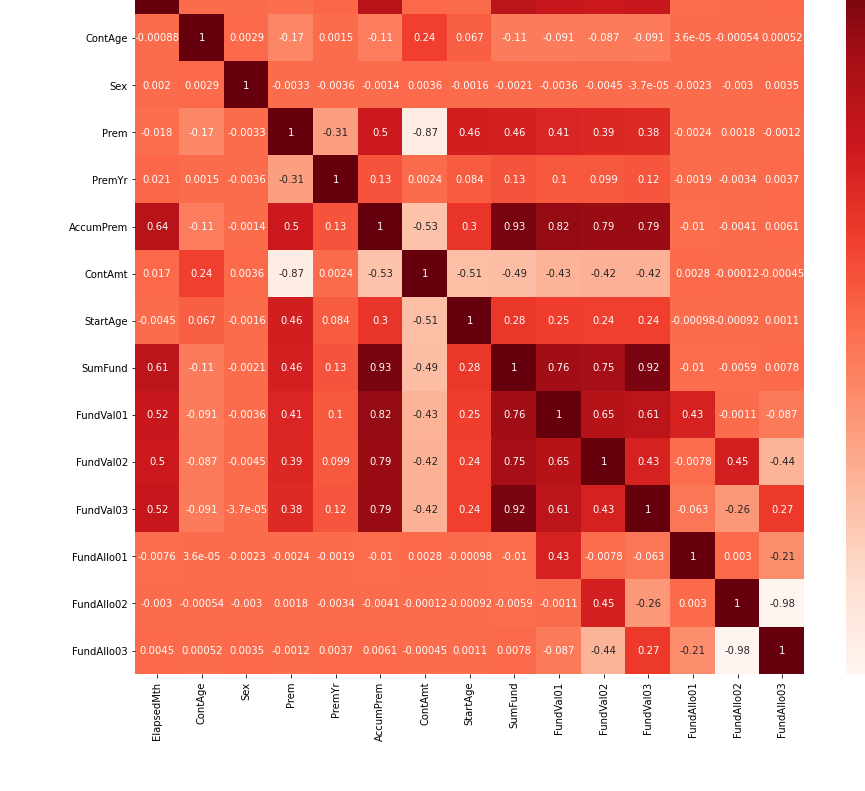

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상관계수 히트맵 - 기초데이터
cols = ['ElapsedMth', 'ContAge', 'Sex', 'Prem', 'PremYr', 'AccumPrem',
       'ContAmt', 'StartAge', 'SumFund', 'FundVal01', 'FundVal02', 'FundVal03',
       'FundAllo01', 'FundAllo02', 'FundAllo03']

x_adj = x[cols]
cor = x_adj.corr()

plt.subplots(figsize=(15,13))

sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

plt.show()
# fig = plt.gcf()
# fig.savefig('d:\heatmap.png', dpi=fig.dpi)


# heatmap 예제 : https://medium.com/@hertan06/which-features-to-use-in-your-model-350630a1e31c


In [28]:
# 상품종류별 상관관계
# 연금
ann = x[x['ProdCode'] < 8]
life = x[x['ProdCode'] >= 8]

print(ann['Prem'].corr(ann['ContAmt']), life['Prem'].corr(life['ContAmt']))
print(x['ElapsedMth'].corr(x['StartAge']))

nan nan
-0.004493889801006839


In [24]:
life

,ElapsedMth,ContAge,Sex,ProdCode,Prem,PremYr,AccumPrem,ContAmt,StartAge,SumFund,...,IR05,IR06,IR07,IR08,IR09,IR10,IR11,IR12,IR13,IR14
2,120,32,0,14,27.0,20,3240.0,10000.0,52,3176.0,...,0.0107,0.0114,0.0121,0.0128,0.0135,0.0149,0.017,0.0176,0.0185,0.02
3,96,53,1,8,35.0,15,3360.0,10000.0,0,3655.0,...,0.0295,0.0290,0.0285,0.0280,0.0275,0.0265,0.025,0.0240,0.0225,0.02
5,0,20,1,10,46.0,10,0.0,10000.0,0,0.0,...,0.0132,0.0164,0.0196,0.0228,0.0260,0.0324,0.042,0.0456,0.0510,0.06
6,132,27,0,9,47.0,10,5640.0,10000.0,0,6602.0,...,0.0220,0.0240,0.0260,0.0280,0.0300,0.0340,0.040,0.0400,0.0400,0.04
8,36,26,0,13,35.0,15,1260.0,10000.0,41,1393.0,...,0.0107,0.0114,0.0121,0.0128,0.0135,0.0149,0.017,0.0176,0.0185,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,132,21,1,8,31.0,15,4092.0,10000.0,0,4354.0,...,0.0214,0.0228,0.0242,0.0256,0.0270,0.0298,0.034,0.0312,0.0270,0.02
99993,72,38,1,14,55.0,10,3960.0,10000.0,48,4025.0,...,0.0321,0.0342,0.0363,0.0384,0.0405,0.0447,0.051,0.0528,0.0555,0.06
99994,216,32,0,11,48.0,10,5760.0,10000.0,0,7148.0,...,0.0214,0.0228,0.0242,0.0256,0.0270,0.0298,0.034,0.0352,0.0370,0.04
99995,132,44,0,13,112.0,5,6720.0,10000.0,74,7227.0,...,0.0321,0.0342,0.0363,0.0384,0.0405,0.0447,0.051,0.0528,0.0555,0.06


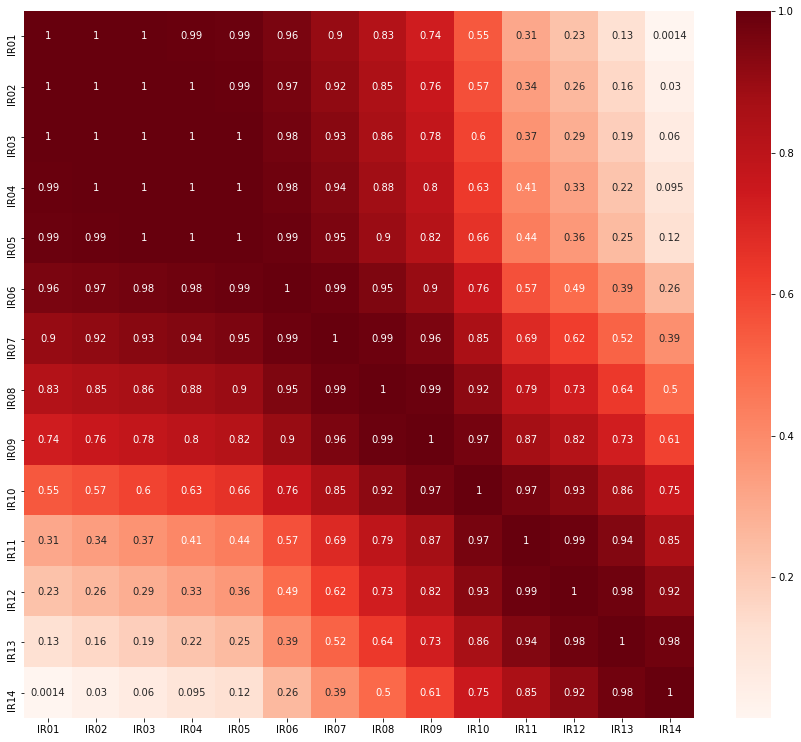

In [148]:

# 상관계수 히트맵 - 금리
cols = ['IR01','IR02','IR03','IR04','IR05','IR06','IR07','IR08','IR09','IR10','IR11','IR12','IR13','IR14']

x_adj = x[cols]
cor = x_adj.corr()

plt.subplots(figsize=(15,13))

sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

plt.show()

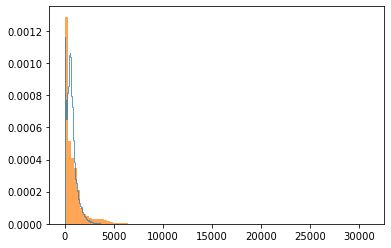

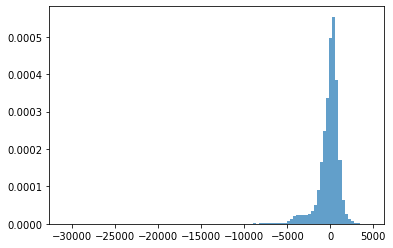

count    100000.000000
mean       -174.219891
std        1338.478088
min      -30897.536743
25%        -552.985852
50%         113.405394
75%         559.563717
max        4477.130615
Name: ov, dtype: float64
count    100000.000000
mean        670.014909
std         518.930552
min           1.915505
25%         315.577552
50%         576.559495
75%         881.710996
max        5838.505147
Name: pv_fee, dtype: float64
count    100000.000000
mean        844.234800
std        1199.456423
min           0.000000
25%          76.259331
50%         496.795526
75%        1104.979501
max       30988.458691
Name: pv_claim, dtype: float64


-3.106603546911072

In [4]:
# 데이터 살펴보기 - 히스토그램
import matplotlib.pyplot as plt

# 수수료, 클레임 히스토그램 출력
plt.hist(xy['pv_fee'] , bins=100, density=True, alpha=0.7, histtype='step') # 막대내부가 비어있음 stepfilled
plt.hist(xy['pv_claim'], bins=100, density=True, alpha=0.7, histtype='stepfilled')
plt.show()
plt.hist(xy['ov'], bins=100, density=True, alpha=0.7, histtype='stepfilled')
plt.show()

# ==> 수수료, 클레임 모두 왼쪽에 치우침(특히 클레임은 너무 심함)
# ==> 로그 취해줘야함


from scipy.stats import skew, kurtosis

# 통계량
print(xy['ov'].describe())
print(xy['pv_fee'].describe())
print(xy['pv_claim'].describe())
# count    100000.000000
# mean       -174.219891
# std        1338.478088
# min      -30897.536743
# 25%        -552.985852
# 50%         113.405394
# 75%         559.563717
# max        4477.130615
# Name: ov, dtype: float64

# 왜도

# -3.106603546911072


In [7]:
skew(xy['ov']), skew(xy['pv_fee']), skew(xy['pv_claim'])

(-3.106603546911072, 1.5490278722533632, 4.036146747161343)

[  0  20  40  60  80 100 120 140 160 180 200 220 240 260 280]


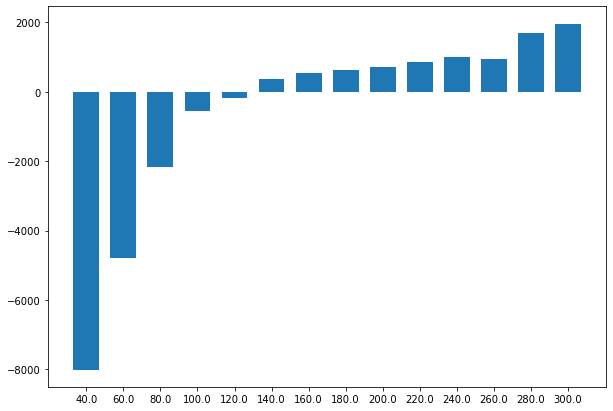

In [8]:
def GetMoneyness(x):
    x_ = x.copy(True)
    x_['Moneyness'] = x_.apply(lambda row: row['SumFund']/row['AccumPrem']*100 if row['AccumPrem'] > 0 else 0, axis=1)
    x_['FundVal01'] = x_.apply(lambda row: row['FundVal01']/row['SumFund']*100 if row['SumFund'] > 0 else 0, axis=1)
    x_['FundVal02'] = x_.apply(lambda row: row['FundVal02']/row['SumFund']*100 if row['SumFund'] > 0 else 0, axis=1)
    x_['FundVal03'] = x_.apply(lambda row: row['FundVal03']/row['SumFund']*100 if row['SumFund'] > 0 else 0, axis=1)
    del x_['SumFund']
    return x_

xy_money = GetMoneyness(xy)
xy_money = xy_money[['Moneyness', 'ov', 'AccumPrem']]
xy_money = xy_money[xy_money['AccumPrem']>0.00001] # 신계약은 삭제
del xy_money['AccumPrem']


bins = np.arange(0, 300, 20)
print(bins)
xy_money['Moneyness'] = np.digitize(xy_money['Moneyness'], bins)
xy_money['Moneyness'] = xy_money['Moneyness'] * 20.0
np.sort(xy_money['Moneyness'].unique())

grouped = pd.DataFrame(xy_money.groupby(['Moneyness'])['ov'].mean())
grouped['Moneyness'] = grouped.index
grouped.columns = ['ov','Moneyness']
grouped

import matplotlib.pyplot as plt

rg = np.arange(len(grouped))

# plt.bar(rg, grouped['ov'])
# plt.xticks(rg, grouped['Moneyness'])

plt.subplots(figsize=(10,7))
plt.bar(rg, grouped['ov'], tick_label=grouped['Moneyness'],
        #width=0.6, align='edge', color="springgreen", edgecolor="gray", linewidth=3, log=False
        width=0.7
        )

plt.show()

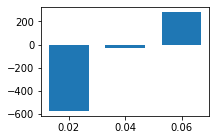

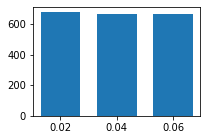

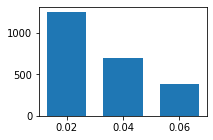

In [168]:
# 장기금리 수준별 ov, fee, claim 민감도
cols = ['IR14', 'pv_fee', 'pv_claim', 'ov']
xy_parted = xy[cols]

def OVPlot(varName):
    grouped = pd.DataFrame(xy_parted.groupby(['IR14'])[varName].mean())
    grouped['IR14'] = grouped.index

    rg = np.arange(len(grouped))
    plt.subplots(figsize=(3,2))
    plt.bar(rg, grouped[varName], tick_label=grouped['IR14'], width=0.7)
    # plt.ylim(0, 1300)
    plt.show()

OVPlot('ov')
OVPlot('pv_fee')
OVPlot('pv_claim')


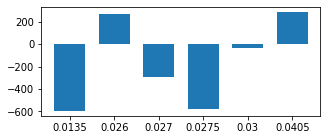

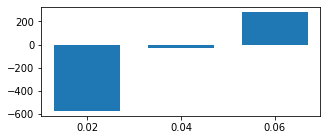

In [178]:
# 금리테너별 ov 민감도
cols = ['IR06', 'IR09', 'IR12','IR14', 'ov'] # 금리를 4부분으로 묶을 수 있음
xy_parted = xy[cols]

def OVPlot2(irName):
    grouped = pd.DataFrame(xy_parted.groupby([irName])['ov'].mean())
    grouped[irName] = grouped.index

    rg = np.arange(len(grouped))
    plt.subplots(figsize=(5,2))
    plt.bar(rg, grouped['ov'], tick_label=grouped[irName], width=0.7)
    # plt.ylim(0, 1300)
    plt.show()

#OVPlot2('IR06')
OVPlot2('IR09')
#OVPlot2('IR12')
OVPlot2('IR14')


In [ ]:
# 공분산 행렬 1
import seaborn as sns

x_sample = x.sample(n=1000)
y_sample = y.loc[x_sample.index]

x_sample_selected = x_sample[['ElapsedMth', 'ContAge', 'ProdCode', 'StartAgeOfSomething']]

dt_sample = pd.concat([x_sample_selected, y_sample], axis=1)

sns.pairplot(dt_sample, diag_kind="kde")

# 공분산 행렬 2
x_sample_selected_2 = x_sample[['SumFund', 'FundVal01', 'FundVal02', 'FundVal03', 'FundAllo01', 'FundAllo02', 'FundAllo03']]

dt_sample_2 = pd.concat([x_sample_selected_2, y_sample], axis=1)

sns.pairplot(dt_sample_2, diag_kind="kde")

In [ ]:
# 클레임은 0이 너무 많고 왼쪽으로 치우쳐 있음
# 상품별 쪼갬
i_t1 = xTrain[xTrain['prd_0'].isin([1]) | xTrain['prd_1'].isin([1])| xTrain['prd_2'].isin([1])| xTrain['prd_3'].isin([1])].index
i_t2 = xTrain[xTrain['prd_4'].isin([1]) | xTrain['prd_5'].isin([1])| xTrain['prd_6'].isin([1])| xTrain['prd_7'].isin([1])].index
i_t3 = xTrain[xTrain['prd_8'].isin([1]) | xTrain['prd_9'].isin([1])| xTrain['prd_10'].isin([1])| xTrain['prd_11'].isin([1])].index
i_t4 = xTrain[xTrain['prd_12'].isin([1]) | xTrain['prd_13'].isin([1])| xTrain['prd_14'].isin([1])| xTrain['prd_15'].isin([1])].index

# 상품별 OV = pv_fee - pv_claim 보기
def GetOV(prd):
    f = sum(prd['pv_fee'])/100000
    c = sum(prd['pv_claim'])/100000
    return [f, c, f-c]

prd = yTrain.loc[i_t1]; print(GetOV(prd)) #[256.4795176071269, 50.254066305835664, 206.22545130129126]
prd = yTrain.loc[i_t2]; print(GetOV(prd)) #[809.3416604294406, 103.89489528100849, 705.4467651484321]
prd = yTrain.loc[i_t3]; print(GetOV(prd)) #[440.45477144164687, 388.15540485731714, 52.29936658432973]
prd = yTrain.loc[i_t4]; print(GetOV(prd)) #[747.8668902566694, 160.45150289817, 587.4153873584994]


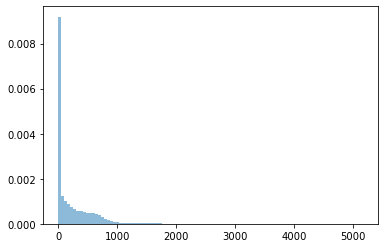

In [ ]:
# 상품별 클레임 히스토그램  
plt.hist(yTrain.loc[i_t4]['pv_claim'], bins=100, density=True, alpha=0.5, histtype='stepfilled') #색칠됨 'stepfilled', 아님 'step'
plt.show()

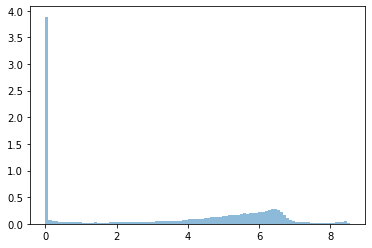

In [ ]:
# 로그 취해줌
yTrain_log = np.log1p(yTrain)

plt.hist(yTrain_log.loc[i_t4]['pv_claim'], bins=100, density=True, alpha=0.5, histtype='stepfilled') #색칠됨 'stepfilled', 아님 'step'
plt.show()

In [ ]:
# 범주형 변수 원핫인코딩
x = pd.get_dummies(x, columns=['ProdCode'], prefix='prd')

# 트레이닝, 밸리 나누기
from sklearn.model_selection import train_test_split
xVal, xTrain, yVal, yTrain = train_test_split(x, y, test_size=0.8)



In [ ]:

# target과 가장 correlated 된 features 를 k개 고르기.

## f_regresison, SelectKBest 불러오기.
from sklearn.feature_selection import f_regression, SelectKBest
## selctor 정의하기.
selector_fee = SelectKBest(score_func=f_regression, k=20)
selector_claim = SelectKBest(score_func=f_regression, k=20)
## 학습데이터에 fit_transform 
x_selected_fee = selector_fee.fit_transform(xTrain, yTrain['pv_fee'])
x_selected_claim = selector_claim.fit_transform(xTrain, yTrain['pv_claim'])
## 테스트 데이터는 transform
x_val_selected_fee = selector_fee.transform(xVal)
x_val_selected_claim = selector_claim.transform(xVal)
## 출력
x_selected_claim.shape, x_val_selected_claim.shape



((80000, 20), (20000, 20))

In [ ]:
# 기존컬럼들 출력
all_names = xTrain.columns

# 클레임 분석
## selector.get_support()
selected_mask = selector_claim.get_support()
## 선택된 특성(변수)들
selected_names = all_names[selected_mask]
## 선택되지 않은 특성(변수)들
unselected_names = all_names[~selected_mask]
print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

# 결과 해석 - 클레임
## 경과년도, 가입나이, 보험료, 누적보험료 중요함 -- 예상됨
## ContAmt는 의외.. 연금은 0으로 들어가서 그런가봄 --> contAmt는 상품분류와 다름없음
## 상품코드는 종신일반형만 중요함(8,9,10) : 다른것들은 클레임이 거의 0이어서...


Selected names:  Index(['ElapsedMth', 'ContAge', 'Prem', 'PremYr', 'AccumPrem', 'ContAmt',
       'StartAgeOfSomething', 'SumFund', 'FundVal01', 'FundVal02', 'FundVal03',
       'IR09', 'IR10', 'IR11', 'IR12', 'IR13', 'IR14', 'prd_8', 'prd_9',
       'prd_10'],
      dtype='object')
Unselected names:  Index(['Sex', 'FundAllo01', 'FundAllo02', 'FundAllo03', 'IR01', 'IR02', 'IR03',
       'IR04', 'IR05', 'IR06', 'IR07', 'IR08', 'prd_0', 'prd_1', 'prd_2',
       'prd_3', 'prd_4', 'prd_5', 'prd_6', 'prd_7', 'prd_11', 'prd_12',
       'prd_13', 'prd_14', 'prd_15'],
      dtype='object')


In [ ]:
# Fee 분석
## selector.get_support()
selected_mask = selector_fee.get_support()
## 선택된 특성(변수)들
selected_names = all_names[selected_mask]
## 선택되지 않은 특성(변수)들
unselected_names = all_names[~selected_mask]
print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

# 결과 해석 - Fee
## 경과년도, 보험료, 누적보험료, 시작나이 적립금 -- 예상됨
## 상품코드는 대부분이 중요함. 클레임과 비교
## 펀드투입비율은 중요하지 않음..

Selected names:  Index(['ElapsedMth', 'Prem', 'AccumPrem', 'StartAgeOfSomething', 'SumFund',
       'FundVal01', 'FundVal02', 'FundVal03', 'prd_0', 'prd_1', 'prd_2',
       'prd_3', 'prd_4', 'prd_5', 'prd_6', 'prd_7', 'prd_12', 'prd_13',
       'prd_14', 'prd_15'],
      dtype='object')
Unselected names:  Index(['ContAge', 'Sex', 'PremYr', 'ContAmt', 'FundAllo01', 'FundAllo02',
       'FundAllo03', 'IR01', 'IR02', 'IR03', 'IR04', 'IR05', 'IR06', 'IR07',
       'IR08', 'IR09', 'IR10', 'IR11', 'IR12', 'IR13', 'IR14', 'prd_8',
       'prd_9', 'prd_10', 'prd_11'],
      dtype='object')


In [ ]:
##### PCA ###############################

## robust scaler
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
robustScaler.fit(xTrain)
xTrain_robustScaled = robustScaler.transform(xTrain)

xTrain_robustScaled[11]



array([-0.7       , -0.70588235,  1.        ,  0.        ,  0.5       ,
       -0.475     , -1.        ,  0.12307692, -0.47515264, -0.08262454,
       -0.29377341, -0.32820592,  0.5       ,  0.        , -0.14285714,
       -0.5       , -0.52879581, -0.57142857, -0.61046512, -0.65644172,
       -0.9047619 , -1.35955056, -2.46153846, -3.375     , -1.98666667,
       -1.        , -0.81481481, -0.64912281, -0.5       ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [ ]:
# pca
from sklearn.decomposition import PCA
n = 2 # 주성분을 몇개로 할지 결정
pca = PCA(n_components=n)
printcipalComponents = pca.fit_transform(xTrain_robustScaled)

# 주성분으로 이루어진 데이터 프레임 구성
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['pc'+ str(i) for i in range(1,n+1)])



In [ ]:
# pca 출력
print(principalDf.head(), '\n')
print(pca.explained_variance_ratio_, '\n')
print(sum(pca.explained_variance_ratio_), '\n')
print(xTrain.columns, '\n')
print(np.round_(pca.components_, 1), '\n')


        pc1       pc2
0 -0.268442 -1.222652
1 -5.210349 -1.477110
2 -5.206645 -0.504367
3  5.383906 -1.117151
4  5.381048 -1.230888 

[0.49636395 0.18701824] 

0.6833821893325813 

Index(['ElapsedMth', 'ContAge', 'Sex', 'Prem', 'PremYr', 'AccumPrem',
       'ContAmt', 'StartAgeOfSomething', 'SumFund', 'FundVal01', 'FundVal02',
       'FundVal03', 'FundAllo01', 'FundAllo02', 'FundAllo03', 'IR01', 'IR02',
       'IR03', 'IR04', 'IR05', 'IR06', 'IR07', 'IR08', 'IR09', 'IR10', 'IR11',
       'IR12', 'IR13', 'IR14', 'prd_0', 'prd_1', 'prd_2', 'prd_3', 'prd_4',
       'prd_5', 'prd_6', 'prd_7', 'prd_8', 'prd_9', 'prd_10', 'prd_11',
       'prd_12', 'prd_13', 'prd_14', 'prd_15'],
      dtype='object') 

[[ 0.   0.  -0.   0.   0.   0.  -0.   0.   0.   0.   0.   0.   0.  -0.
   0.  -0.1 -0.1 -0.1 -0.1 -0.1 -0.2 -0.3 -0.5 -0.6 -0.4 -0.2 -0.1 -0.1
  -0.1 -0.   0.   0.  -0.   0.   0.  -0.   0.   0.  -0.  -0.  -0.  -0.
  -0.  -0.  -0. ]
 [ 0.3 -0.   0.   0.1  0.   0.4 -0.1  0.1  0.5  0.4  0.3  0.4 

In [ ]:

# pca 시각화... 망함
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

#['ElapsedMth', 'ContAge', 'Prem', 'PremYr', 'AccumPrem', 'ContAmt', 'StartAgeOfSomething', 'SumFund', 'IR13', 'IR14' 'FundVal01', 'FundVal02', 'FundVal03', 'IR09', 'IR10', 'IR11', 'IR12', 'IR13', 'IR14', 'prd_8', 'prd_9', 'prd_10']

cols = ['ElapsedMth', 'ContAge', 'Prem', 'PremYr', 'IR14']

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(printcipalComponents, x=0, y=1)

for i, feature in enumerate(cols):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()